In [1]:
from functools import reduce
import pathlib
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from adjustText import adjust_text # https://stackoverflow.com/questions/34693991/repel-annotations-in-matplotlib

# sys.path.append('/rumi/shams/abe/CanDI/')
sys.path.append('/data_gilbert2/backups/aarab/CanDI')

from CanDI import candi as can

In [19]:
sys.path.append('..')

from scripts.candi_functions import *
from scripts.util import *

import pandas as pd
import numpy as np

import anndata as ad
import scanpy as sc

from pydeseq2.preprocessing import deseq2_norm

In [3]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')


In [4]:
from venn import venn 

In [5]:
wd = '/data_gilbert/home/aarab/AML/Decitabine-treatment'

#### c5_go_gmt

In [6]:
# import blitzgsea as blitz

In [7]:
# pager_annotation_path = '/data_gilbert/home/aarab/tools/pager/annotations/human'

In [8]:
# c5_go_gmt = blitz.enrichr.read_gmt(
#     f'{pager_annotation_path}/msigdb_v7.4_c5.go/c5.go.v7.4.symbols.gmt'
# )

# 

___

In [9]:
# import cancer_data as candata

In [10]:
# from glob import glob
# import bioinfokit
# bioinfokit.__version__

In [11]:
aml = can.Cancer("AML", subtype='AML')

# Number of AML lines
print(len(aml.depmap_ids))

54


In [12]:
our_aml_panel = can.data.cell_lines[can.data.cell_lines.cell_line_name.isin([
    "SKM-1","MOLM-13",'HL-60',
    'MOLM-14','OCI-AML3','KG-1'
])].cell_line_name.to_dict()

In [13]:
# lu.depmap_ids
can.data.cell_lines.loc[
    can.data.cell_lines.cell_line_name.isin(our_aml_panel.values()),:
].set_index('cell_line_name')[['Subtype']]

,Subtype
cell_line_name,
HL-60,"Acute Myelogenous Leukemia (AML), M3 (Promyelo..."
OCI-AML3,"Acute Myelogenous Leukemia (AML), M4 (Myelomon..."
MOLM-13,Acute Myelogenous Leukemia (AML)
SKM-1,Acute Myelogenous Leukemia (AML)
KG-1,Acute Myelogenous Leukemia (AML)
MOLM-14,Acute Myelogenous Leukemia (AML)


# 

In [14]:
not_aml = can.CellLineCluster(list(set(can.data.cell_lines.index) - set(aml.depmap_ids)))

In [15]:
candi = can.CellLineCluster(can.data.cell_lines.index.to_list())

In [16]:
# sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,color='black', alpha=.1)
# sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,hue="name", alpha=.8)


# 

In [17]:
candi_exp = candi.rnaseq_reads.T

rnaseq_reads has not been loaded. Do you want to load, y/n?>  y


Load Complete


In [20]:
candi_exp_norm = deseq2_norm(np.log2(candi_exp+1))[0]

In [21]:
# # genes = our_aml_panel
# df = candi_exp_norm.loc[genes,:].reset_index().melt(id_vars=['gene'],var_name='cell_line',value_name='expression')
# df['lineage_subtype'] = can.data.cell_lines['lineage_subtype'][df['cell_line']].to_list()
# df['lineage_subtype'] = pd.Categorical(
#     df['lineage_subtype'], categories=df.groupby('lineage_subtype')['expression'].median().sort_values(ascending=False).index
# )

In [22]:
# fig, ax = plt.subplots(figsize=(10,5))

# sns.violinplot(data=df, x="lineage_subtype", y="expression", inner=None, color=".8", fill=False)
# # Add individual data points
# sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,color='black', alpha=.1)
# sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,hue="name", alpha=.8)

# # ax.legend(title='Cell Line')
# # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# # for value in our_aml_panel:
# #     plt.scatter(x=value, y=0, color='red', s=100, zorder=10)  # Highlight dots
# #     plt.annotate(f'{value}', (value, 0), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# # ax.set_ylim(bottom=-10,top=405)
# ax.set_ylabel('normalized counts')
# ax.set_title('Gene Expression in AML cell lines')

# # plt.savefig('aml-panel-gene-expression.pdf')
# plt.show()

## expression

In [23]:
gene_panel = [
    # 'TP53',
    'METTL3', 'YTHDF2', 'YTHDC1', 'ZC3H13', 'VIRMA',#'KIAA1429', 
    "METTL14",
    'FTO','ALKBH5',
    'DCK', 'SLC29A1', 'BCL2', 'MCL1',
    'DCPS', 'DCP2', 'DCP1A', 'SCAF8',
    'CBLL1',
    'PTEN', 'SQLE', 'INTS5', 'DHODH', 'MYBBP1A',
    'INO80D', 'PMPCA', 'ZNF777', 'SLC7A6', 'RNF126', 'RBM14-RBM4',
]

### 

In [24]:
candi_adata = ad.AnnData(
    X=candi.rnaseq_reads.T,
    obs=can.data.cell_lines.loc[candi.rnaseq_reads.columns,['lineage','lineage_subtype','primary_disease']]
)

filt_lineage_subtype = candi_adata.obs.groupby('lineage_subtype').size().le(5)
filt_lineage_subtype = filt_lineage_subtype[filt_lineage_subtype].index.to_list() + ['Engineered']

candi_adata = candi_adata[candi_adata.obs.query(f'lineage_subtype not in {filt_lineage_subtype}').index,:].copy()

candi_adata.X = deseq2_norm(np.log2(candi_adata.X+1))[0]

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/screenpro2/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [25]:
aml_cellxgene_counts = []

for gene in gene_panel:
    a = candi_adata[:,candi_adata.var.index == gene].copy()
    d = pd.concat([a.to_df()[gene],a.obs],axis=1)

    d['AML'] = d.lineage_subtype.eq('AML')
    aml_cellxgene_counts.append(
        d.reset_index(names='depmap_id').set_index(['depmap_id','lineage','lineage_subtype','primary_disease','AML'])
    )

aml_cellxgene_counts = pd.concat(aml_cellxgene_counts,axis=1).reset_index(
    ['depmap_id','AML']
).melt(id_vars=['AML','depmap_id'],value_name='counts')

aml_cellxgene_counts['name'] = [
    'other' if not cell_line in our_aml_panel.keys() else can.data.cell_lines.loc[
        cell_line,
        'cell_line_name'
    ]
    for cell_line in aml_cellxgene_counts.depmap_id
]

In [26]:
# # Add individual data points
# sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,linewidth=.3,color='black', alpha=.2)
# sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,linewidth=.3,hue="name", alpha=.8)

# ax.legend(title='Cell Line')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# # ax.set_ylim(bottom=-9,top=75)
# ax.set_ylim(bottom=0,top=13)
# ax.set_title('Gene expression in AML cell lines')

# plt.savefig('aml-panel-gene-expression.pdf')
# plt.show()

/tmp/ipykernel_82863/143409373.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.8'` for the same effect.

  sns.violinplot(data=aml_cellxgene_counts,
/tmp/ipykernel_82863/143409373.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


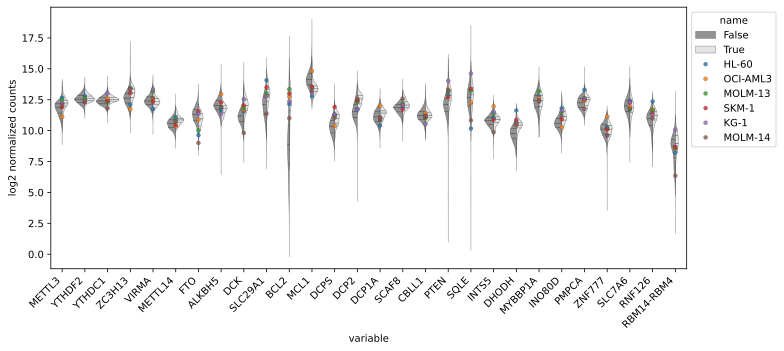

In [28]:
fig, ax = plt.subplots(figsize=(11,5))

sns.violinplot(data=aml_cellxgene_counts,
               x='variable', 
               y='counts', 
               hue='AML',
               linewidth=.5,
               width=1,
               # bw_adjust=.1,
               split=True,
               # gap=.3,
               # inner=None, 
               inner='quart', 
               color=".8", 
               ax=ax,
               # fill=False
              alpha=.5)

# Add individual data points
# sns.stripplot(data=aml_cellxgene_counts.query('name == "other"').copy(), jitter=False,x="variable", y="counts", size=1,linewidth=.3,color='black', alpha=.2)
sns.stripplot(data=aml_cellxgene_counts.query('name != "other"').copy(), jitter=False,x="variable", y="counts", size=4,linewidth=.3,hue="name", alpha=.8)


sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_ylabel('log2 normalized counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.savefig('aml-panel-gene-expression.pdf')
plt.show()
plt.close()

### 

In [29]:
# aml_exp = aml.rnaseq_reads
# aml_exp.index.name = None

# ### 

# aml_panel_rnaseq_exp = pd.read_csv('../DAC/RNA-seq/exp/deseq2_raw_counts.txt',sep='\t').set_index('name')

# ol_genes = list(set(aml_exp.index) & set(aml_panel_rnaseq_exp.index))

# len(ol_genes)

# import anndata as ad
# import scanpy as sc

# aml_exp_merged = ad.AnnData(
#     X=pd.concat([
#         aml_exp.loc[ol_genes,:].query('~index.duplicated()'),
#         aml_panel_rnaseq_exp.loc[ol_genes,:].query('~index.duplicated()')
#     ],axis=1).T
# )

# aml_exp_merged.X = deseq2_norm(np.log1p(aml_exp_merged.X))[0]

# aml_exp_merged.obs['treatment'] = ''
# aml_exp_merged.obs.loc[aml_exp_merged.obs.index.str.contains('_t_'),'treatment'] = 'Decitabine'
# aml_exp_merged.obs.loc[aml_exp_merged.obs.index.str.contains('_u_'),'treatment'] = 'DMSO'

# aml_exp_merged.obs.index

# aml_exp_merged.obs.loc[aml_exp_merged.obs.index.str.contains('_t_'),'treatment'] = 'Decitabine'

# sc.pp.pca(aml_exp_merged)
# sc.pp.neighbors(aml_exp_merged)

# sc.tl.umap(aml_exp_merged)

# sc.pl.pca(aml_exp_merged,size=100,color='treatment')



# sc.pl.umap(aml_exp_merged,size=100,color='treatment')

# ### 

# aml_exp_norm = deseq2_norm(np.log1p(aml_exp.T))[0].T

# aml_exp.max().max()

# aml_exp_norm.max().max()



# # fig, ax = plt.subplots(figsize=(9,3))

# # sns.violinplot(data=df, x="gene", y="expression", linewidth=.5, inner=None, color=".8", fill=False)
# # # Add individual data points
# # sns.stripplot(data=df.query('name == "other"').copy(), jitter=True,x="gene", y="expression", size=2,linewidth=.3,color='black', alpha=.2)
# # sns.stripplot(data=df.query('name != "other"').copy(), jitter=True,x="gene", y="expression", size=3,linewidth=.3,hue="name", alpha=.8)

# # ax.legend(title='Cell Line')
# # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# # # ax.set_ylim(bottom=-9,top=75)
# # ax.set_ylim(bottom=0,top=13)
# # ax.set_ylabel('log1p\nnormalized\ncounts')
# # ax.set_title('Gene expression in AML cell lines')

# # plt.savefig('aml-panel-gene-expression.pdf')
# # plt.show()

## mutation

In [30]:
# AML = can.Cancer("AML")

In [31]:
# dnmt1_mt, dnmt1_wt = mt_wt_objs(AML, ['DNMT1'])

In [32]:
# mt_effect, wt_effect = gene_effect_scatter(
#     dnmt1_mt, dnmt1_wt,return_effect=True,plot=False
# )

In [33]:
# labels = intersection (
#     mt_effect[mt_effect <= 0.45].index.tolist(),wt_effect[wt_effect >= 0.7].index.tolist()
# ) + intersection (mt_effect[mt_effect >= 0.65].index.tolist(),wt_effect[wt_effect <= 0.3].index.tolist())

In [34]:
# gene_effect_scatter(
#     dnmt1_mt, dnmt1_wt,
#     genes=['DHODH'],
#     name_scatter='DNMTs',
#     # name='DNA-RNA-mtyl-m6A-scatter.pdf'
# )

# # run_enrichment(labels)

___

In [35]:
aml_mu = dict([(gene, can.data.cell_lines.loc[cell_lines,'cell_line_name'].to_list()) for gene, cell_lines in aml.mutated(output='dict').items()])

mutations has not been loaded. Do you want to load, y/n?>  y


Load Complete


In [39]:
our_aml_panel_mu = pd.concat(dict([
    (line_name,
     pd.DataFrame(can.CellLine(line).mutated(output='dataframe').groupby(['Variant_Classification','gene']).size())
    )
    for line, line_name in our_aml_panel.items()
])).rename(columns={0:'mutation'}).reset_index(names=['cell_line','Variant_Classification','gene'])

In [40]:
our_aml_panel_mu.cell_line.unique()

array(['HL-60', 'OCI-AML3', 'MOLM-13', 'SKM-1', 'KG-1', 'MOLM-14'],
      dtype=object)

___

In [41]:
loss_of_function = [
    'Frame_Shift_Del',
    'Frame_Shift_Ins', 
    # 'In_Frame_Del',
    'Missense_Mutation',
    # 'Nonsense_Mutation', 
    # 'Nonstop_Mutation',
    'Splice_Site',
    'Start_Codon_SNP',
    'De_novo_Start_OutOfFrame',
    'In_Frame_Ins', 
    'Stop_Codon_Del', 
    'Stop_Codon_Ins'
]

In [42]:
our_aml_panel_mu_filt = our_aml_panel_mu[our_aml_panel_mu.Variant_Classification.isin(loss_of_function)]

In [43]:
mu_stats = our_aml_panel_mu_filt.groupby(
    ['gene','Variant_Classification']
).apply(
    lambda x: ', '.join(x['cell_line'])
).reset_index(name='cell_lines')

# mu_stats['n_cell_lines'] = mu_stats.cell_lines.str.count(',')+1
# mu_stats = mu_stats.sort_values(by=['n_cell_lines','cell_lines'],ascending=False).reset_index(drop=True)
                                                                                                        
mu_stats.query(f'gene in {gene_panel}')

# mu_stats_v2 = mu_stats.groupby(['n_cell_lines','cell_lines']).apply(
#     lambda x: ', '.join(x['gene'])
# ).reset_index(name='mutated_genes').sort_values(by=['n_cell_lines','cell_lines'],ascending=False).reset_index(drop=True)

# mu_stats_v2['n_genes'] = mu_stats_v2.mutated_genes.str.count(',')+1

# mu_stats_v2#.to_excel('aml-panel-mut.xlsx').set_index('gene')

,gene,Variant_Classification,cell_lines
208,DCPS,Missense_Mutation,HL-60
506,MYBBP1A,Missense_Mutation,"MOLM-13, MOLM-14"
628,PMPCA,Missense_Mutation,HL-60


https://www.cell.com/cancer-cell/pdf/S1535-6108(22)00588-8.pdf

In [44]:
our_aml_panel_mu_mat = our_aml_panel_mu_filt.pivot_table(index='cell_line',columns='gene',values='mutation').fillna(0).astype(int)

our_aml_panel_mu_mat = our_aml_panel_mu_mat[our_aml_panel_mu_mat.sum().sort_values(ascending=False).index]

our_aml_panel_mu_mat_zeros = pd.DataFrame(0,columns=list(set(gene_panel) - set(our_aml_panel_mu_mat.columns)),index=our_aml_panel_mu_mat.index)
our_aml_panel_mu_mat = pd.concat([our_aml_panel_mu_mat,our_aml_panel_mu_mat_zeros],axis=1)

In [45]:
# [gene in c5_go_gmt['GOBP_MRNA_PROCESSING'] for gene in gene_panel]

In [46]:
# len(c5_go_gmt['GOBP_MRNA_PROCESSING'])

In [47]:
# our_aml_panel_mu_mat_GOBP_MRNA_PROCESSING = our_aml_panel_mu_mat.loc[:,our_aml_panel_mu_mat.columns.isin(
#     c5_go_gmt['GOBP_MRNA_PROCESSING']
# )]

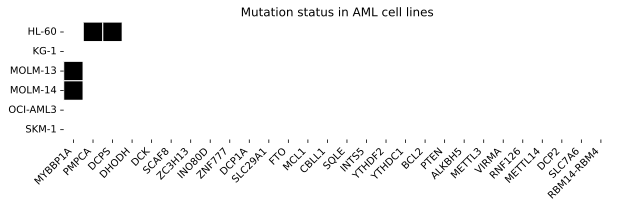

In [48]:
fig, ax = plt.subplots(figsize=(30,3))

sns.heatmap(
    our_aml_panel_mu_mat.loc[:,our_aml_panel_mu_mat.columns.isin(gene_panel)].gt(0).astype(int),
    cbar=False,
    square=True,
    cmap = "Greys",
    linewidths=1,
    ax=ax
)
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(5)
ax.set_ylabel('')
ax.set_title('Mutation status in AML cell lines')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('mutation_binary_heatmap.pdf')
plt.show()

# 

In [47]:
%load_ext watermark

In [48]:
%watermark

Last updated: 2024-02-20T00:18:56.720394-08:00

Python implementation: CPython
Python version       : 3.9.18
IPython version      : 8.15.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 3.10.0-957.27.2.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit



In [49]:
%watermark --iversions

matplotlib: 3.8.0
sys       : 3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:49:32) 
[GCC 12.3.0]
numpy     : 1.26.0
pandas    : 2.1.1
seaborn   : 0.12.2

